<a href="https://colab.research.google.com/github/Benbuk/GOMYCODE_DS_Bootcamp/blob/main/Unsupervised_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Unsupervised Classification
## Objective

In this checkpoint, we are going to work on the 'Credit Card Dataset for Clustering' dataset provided by Kaggle.

Dataset description : This dataset was derived and simplified for learning purposes. It includes usage behaviour of about 9000 active credit card holders during 6 months period. This case requires to develop a customer segmentation to define marketing strategy.


[➡️ Dataset link ](https://drive.google.com/file/d/1Yb4ljRXRQfTmcLOac_5w-pLpvPdFPvnc/view)

**Columns explanation :**

> CUST_ID: Identification of Credit Card holder (Categorical)

> BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

> PURCHASES: Amount of purchases made from account

> CASH_ADVANCE: Cash in advance given by the user

> CREDIT_LIMIT: Limit of Credit Card for user

> PAYMENTS: Amount of Payment done by use


# 1.0 Data Import and Basic Exploration

## 1.1 Dataset importation

In [271]:
#importing Pandas
import pandas as pd
data = pd.read_csv('/content/Credit_card_dataset.csv')

## 1.2 Data Exploration




In [259]:
data.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


In [260]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB


In [261]:
#check for null values in the dataframe
data.isnull().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64

In [262]:
data.duplicated().sum()

0

In [263]:
data.columns

Index(['CUST_ID', 'BALANCE_FREQUENCY', 'PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT',
       'CASH_ADVANCE'],
      dtype='object')

#2.0 Data Preparation

In [272]:
#Handle missing values
data = data.dropna(axis=0, how='any')

#exclude columns not needed
data = data.drop('CUST_ID', axis = 1)


#3.0 Hierarchical Clustering

### 3.1 Visualizing the Dendrogram to identify the number clusters needed

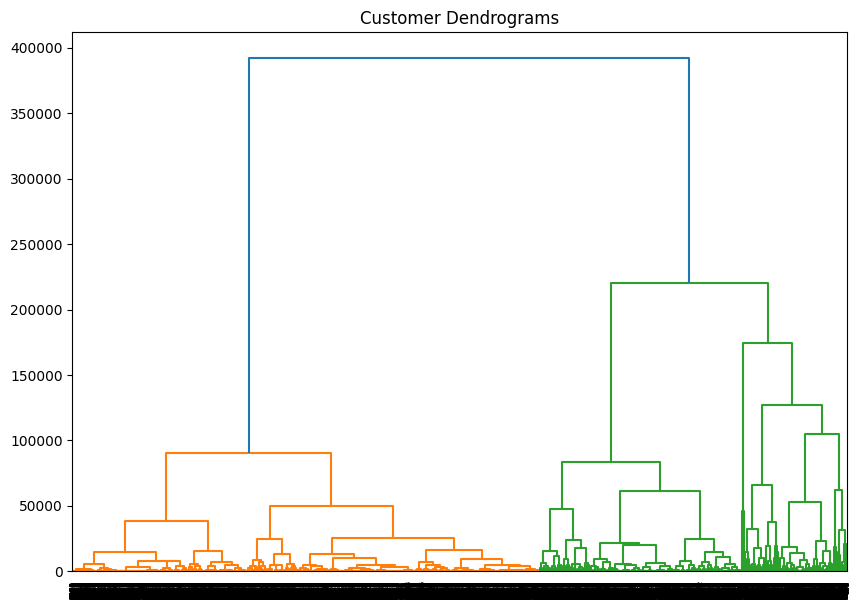

In [265]:
#Dendrogram visualization
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend = shc.dendrogram(shc.linkage(data[['PURCHASES', 'CREDIT_LIMIT']], method="ward"))

### 3.2 Perfoming Clustering

In [266]:
#performing the clustering
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
import matplotlib.pyplot as plt

model=AgglomerativeClustering(n_clusters=4, metric ='euclidean', linkage='complete')
cluster_labels=model.fit_predict(data)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric

#creating a column for agglomerative to be used add color to our scatter plot
agglomerative = pd.DataFrame(cluster_labels)
agglomerative.head()



,0
0,2
1,2
2,2
3,2
4,2


### 3.3 Visualize Result

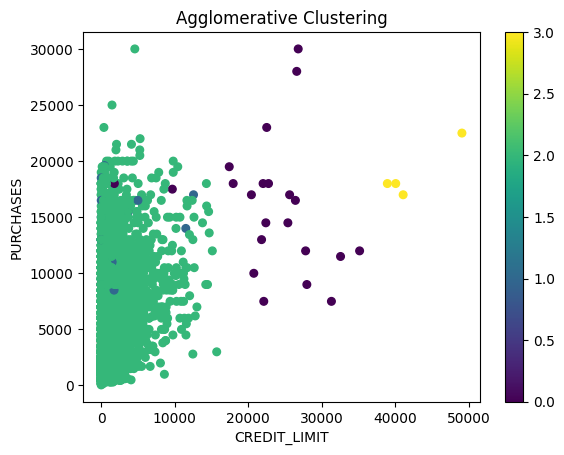

In [281]:
#visualizing the result
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['PURCHASES'] , data ['CREDIT_LIMIT'] , c= agglomerative[0], s=30)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("CREDIT_LIMIT")
ax.set_ylabel("PURCHASES")
plt.colorbar(scatter)

#4.0 K means clutering

### 4.1 Scaling/Standardizing Data

In [273]:
# Example: Scale relevant features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['PURCHASES', 'CREDIT_LIMIT']])

### 4.2 Using Elbow Method to find Optimal K

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

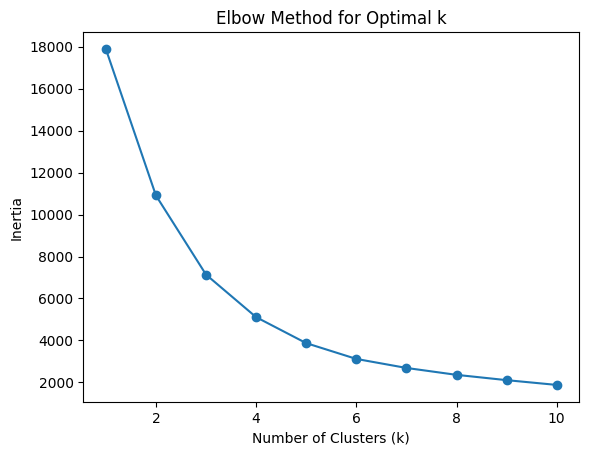

In [274]:
# Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

### 4.3 Running K-means using optimal K value

In [275]:
# Run k-means with optimal k
optimal_k = 4  # replace with your chosen value
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters_4 = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### 4.4 Visualizing the result

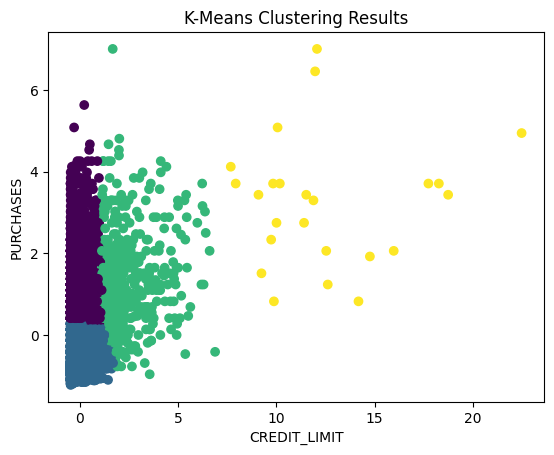

In [279]:
# Example: Scatter plot of clustered data
plt.scatter(x=scaled_data[:, 0], y=scaled_data[:, 1], c=clusters_4, cmap='viridis')
plt.title('K-Means Clustering Results')
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('PURCHASES')
plt.show()

#5.0  Conclusion
The Agglomerative Clustering method was applied to the data, specifying four clusters. However, only three distinct clusters were visually identifiable in the resulting plot. In contrast, when the K-Means Clustering method was used with the same number of clusters, four distinct clusters were clearly visible in the plot. This discrepancy highlights the differences in how these two clustering algorithms interpret and group the data. It’s important to note that the choice of clustering algorithm can significantly impact the analysis results and subsequent interpretations.
